## The request output part 
First experiment with 50 requests in total, 4 requests were rejected (not enqueued) 
With a probability of appr. 70% + 10%, user 2 requests arrived. The rest was left to users 0 and 1.
```
double rNum = random.nextDouble();
if (rNum > 0.3) {                               # 70% user 2
    user = new User(2, ++cnt);
else
    user = new User(random.nextInt(3), ++cnt);  # 10% user 2
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### This is a legend to the data in the csv files:

In [3]:
# IN,  1,     2,1852440846143583, 0,    1,         1
#
#  0,  1  ,   2  ,   3    ,   4   ,     5    ,     6
#
# IN, round, UID, arriTime, deqTime, prioQed,  requestID

#
#prioQed legend:
# F ---> 0    #Fast Queue
# S ---> 1    #Slow Queue
# R ---> 2    #Rejected (not enqueued)

In [34]:
# import csv data TODO

exp_no = 1
#Exp1: 50 req
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#data_all = np.genfromtxt("sorted_log.2024-08-22T23:20:00.212427.csv", delimiter=',')

exp_no = 2
#Exp2: 50 req
#rNum > 0.5 for user 2 and user = new User(random.nextInt(2!!!not 3), ++cnt); for the user 0 and 1
#data_all = np.genfromtxt("sorted_exp2_log.2024-08-29T17:07:01.272412.csv", delimiter=',')

exp_no = 3
#Exp3: 500 req
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#PENALTY_LIMIT = REQUEST_COUNT_LIMIT + 50; //was @ 10
#REQUEST_COUNT_LIMIT = 30 //was 5
#data_all = np.genfromtxt("sorted_exp3_log.2024-08-29T18:56:19.FS_no_R.csv", delimiter=',')

exp_no = 4
#Exp4: 500 req no rejected policy
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#PENALTY_LIMIT = REQUEST_COUNT_LIMIT + infinity; //means no request will be rejected
#REQUEST_COUNT_LIMIT = 30 //was 5
data_all = np.genfromtxt("sorted_exp4_log.2024-09-04T12:49:21.csv", delimiter=',')


In [35]:
#num_rejected = [ i for i in range(len(data_all)) if data_all[i, 5] == "F"]
num_rejected = 0
for i in range(len(data_all)):
    if data_all[i, 5] == 2:
        num_rejected += 1
num_rejected

0

In [36]:
arri_dq_t = 4   # 3 is cv index for arriTime and 4 is deqTime
UID = 2         #csv index for user id
total_requests = 500

csv_row_upper = (len(data_all) // 2)

csv_row_lower = len(data_all)  - 1
total_time_OUT =  data_all[csv_row_lower, arri_dq_t] - data_all[csv_row_upper, arri_dq_t]

total_time_OUT, csv_row_lower, data_all[csv_row_lower,arri_dq_t], data_all[csv_row_upper, arri_dq_t]

(233860874.0, 999, 521888563073124.0, 521888329212250.0)

In [37]:
amount_intervals = 14
time_interval = total_time_OUT / amount_intervals
time_interval

16704348.142857144

In [38]:
in_secs = time_interval / 1E9
in_ms = time_interval / 1E6
print("time_interval: \n{} s\n{} ms".format(in_secs.round(3), in_ms.round(3)))
print
print("Total time for dequeueing: \n{} s\n{} ms".format(round((total_time_OUT / 1E9),3), round((total_time_OUT / 1E6),3)))

time_interval: 
0.017 s
16.704 ms
Total time for dequeueing: 
0.234 s
233.861 ms


In [39]:
len_all = len(data_all)
len_clean = len_all - num_rejected
len_OUT_part = (len_clean // 2)
len_IN_part = csv_row_upper 
len_all, len_clean, len_IN_part, len_OUT_part, csv_row_upper

(1000, 1000, 500, 500, 500)

In [49]:
arr0 = np.zeros([amount_intervals])
arr1 = np.zeros([amount_intervals])
arr2 = np.zeros([amount_intervals])
upper_idx = len_OUT_part // amount_intervals
lower_bound = data_all[csv_row_upper, arri_dq_t]

for k in range(1, amount_intervals + 2): # exceed num of intervals to obtain the latest dequeue time
    arr_idx = k
    if ((k * upper_idx) + len_OUT_part) > (len_clean - 1): # set upper_bound to latest dequeue time
        upper_bound = data_all[(len_clean -1), arri_dq_t]
        arr_idx = amount_intervals
    else:
        upper_bound = data_all[((k * upper_idx) + len_OUT_part), arri_dq_t] # everything below the latest deQ time
    #print(k)   
    #print(((k * upper_idx) + len_OUT_part))
    #print(upper_bound)
    for i in range(csv_row_upper, csv_row_upper + len_OUT_part):
        time = data_all[i, arri_dq_t]
        if k < amount_intervals:
            cond1 = (lower_bound <= time < upper_bound)
        else:
            cond1 = (lower_bound <= time <= upper_bound) #include requests that came latest, too.
        if cond1:  
            #print(lower_bound, time, upper_bound)
            match data_all[i, UID]:
                case 0:
                    arr0[arr_idx - 1] += 1
                case 1:
                    arr1[arr_idx - 1] += 1
                case 2:
                    arr2[arr_idx - 1] += 1
    lower_bound = upper_bound
    #print("--------")
    
arr0.sum(), arr1.sum(), arr2.sum(), arr0, arr1, arr2, arr0.sum()+ arr1.sum()+ arr2.sum()
        

(40.0,
 50.0,
 411.0,
 array([ 3.,  1.,  8.,  7.,  0.,  1.,  4.,  2.,  3., 10.,  0.,  0.,  1.,
         0.]),
 array([6., 3., 4., 5., 2., 8., 7., 4., 2., 6., 0., 3., 0., 0.]),
 array([26., 31., 23., 23., 33., 26., 24., 29., 30., 19., 35., 32., 34.,
        46.]),
 501.0)

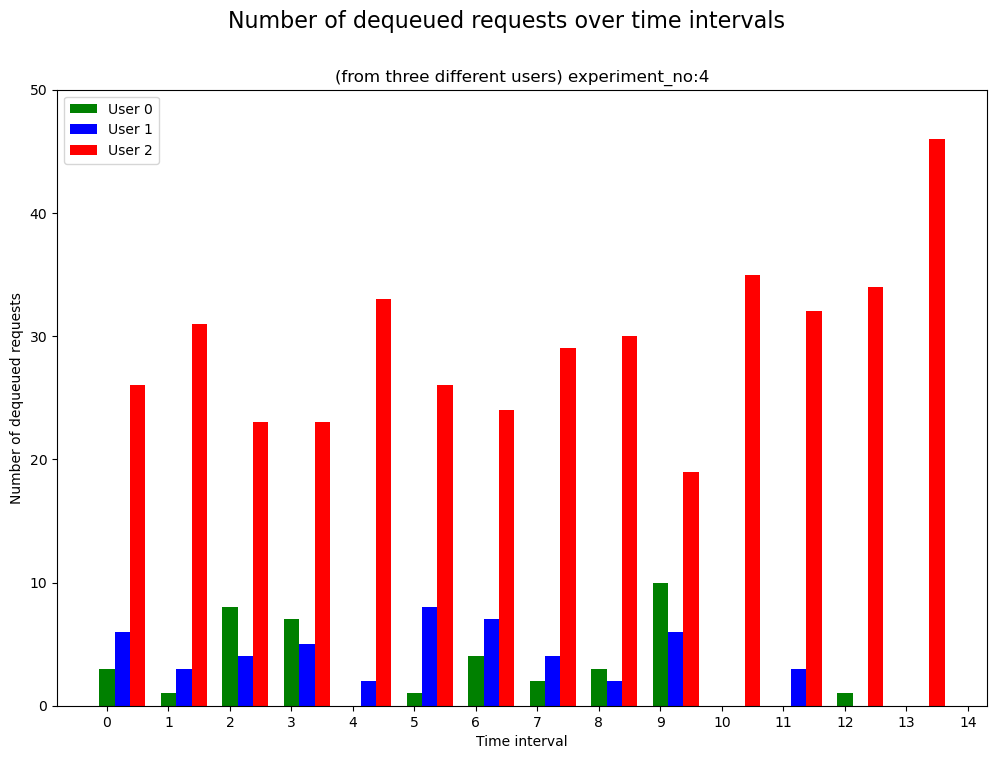

(40.0,
 50.0,
 411.0,
 array([ 3.,  1.,  8.,  7.,  0.,  1.,  4.,  2.,  3., 10.,  0.,  0.,  1.,
         0.]),
 array([6., 3., 4., 5., 2., 8., 7., 4., 2., 6., 0., 3., 0., 0.]),
 array([26., 31., 23., 23., 33., 26., 24., 29., 30., 19., 35., 32., 34.,
        46.]),
 501.0)

In [50]:

x = [i for i in range(amount_intervals)]
width=0.25
#alpha=0.5
ax = plt.figure(figsize=[12, 8])
plt.bar(np.arange(len(arr0)) ,arr0, width,align='center', label='User 0' , color='g')
plt.bar(np.arange(len(arr1)) + width ,arr1, width, align='center',  label='User 1', color='b')
plt.bar(np.arange(len(arr2)) + width*2,arr2, width,align='center',label='User 2' , color='r')
plt.xlabel('Time interval')
plt.ylabel('Number of dequeued requests')
plt.suptitle('Number of dequeued requests over time intervals', fontsize=16)#, y=1.00)
plt.ylim(0,50)
plt.title('(from three different users) experiment_no:{}'.format(exp_no))
plt.xticks(np.arange(len(x)+ width))
plt.legend()

plt.show()

arr0.sum(), arr1.sum(), arr2.sum(),arr0, arr1, arr2, (arr0.sum()+ arr1.sum()+ arr2.sum())